<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/Predicciones_de_ventas_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas a utilizar

In [99]:
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [101]:
import numpy as np

## Transformacion de dato a dataframe pandas

In [102]:
filename = "/content/drive/MyDrive/Data CodingDojo/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#1. caracteristicas de dataframe principal
Filas 8523 - Columnas 12

#2. Tipos de dato en cada columna

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#3. Duplicados
la funcion .duplicated no arroja resultados.
buscando por columnas como Item_Identifier se pueden identificar algunos duplicados pero se debe al mismo productos en distintas tiendas.

para mayor seguridad, busque tanto identificador de item como identificador de tienda para buscar duplicados. arrojando 0 valores duplicados

In [104]:
df.duplicated().sum()

0

In [105]:
df.duplicated(["Item_Identifier","Outlet_Identifier"]).sum()

0

#4. Valores faltantes

In [106]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [107]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [108]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


#5.1 Para la columna Item_Weight, se procedera con el llenado de datos segun la promedio de todos, no es la forma mas precisa pero mientras se busca una definitiva.
la forma definitiva seria llenar el dato con el peso del mismo producto pero ubicado en otras tiendas.


Nuevo dataframe con todos los ID y sus respectivos pesos, si es que existen.
creamos diccionario para iterar y encontrar valores 


In [109]:
df_IW = df.groupby('Item_Identifier')[['Item_Weight']].mean()
dic_IW = dict(zip(df_IW.index,df_IW.values))

for loop para iterar en dataframe, identificar nulos y asignar valores.

In [110]:
for x in df.index:
  if df.loc[x,'Item_Weight'] != np.nan:
    for a in dic_IW.keys():
      if df.loc[x,'Item_Identifier'] == a:
        df.loc[x,'Item_Weight'] = dic_IW[a]
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

luego de la solucion anterior, quedan 4 registros nulos en columna "Item_Weight" los cuales no se encuentran en ningun lado.

por su cantidad, se decide eliminar del dataframe puesto que no es una cantidad que impacte al analisis final

In [112]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [113]:
df.drop(index=[927,1922,4187,5022], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#5.2 Outlet_Size, se llenara dato categorico con la moda.


In [130]:
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [131]:
moda_outlet = df["Outlet_Size"].mode()
moda_outlet.values

array(['Medium'], dtype=object)

In [132]:
df["Outlet_Size"].fillna(moda_outlet.values[0], inplace=True)

In [133]:
df["Outlet_Size"].value_counts()

Medium    5200
Small     2387
High       932
Name: Outlet_Size, dtype: int64

## Con esto, ya no quedan valores nulos

In [114]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#7. Categoria incosistente

Se aprecia con value_counts(), que la columna Item_Fat_Content presenta categorias que representan lo mismo pero descritas de distintas formas

In [115]:
df["Item_Fat_Content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Se procede a cambiar los valores para su estandarizacion

In [116]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")

In [117]:
df["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

# Estadisticas resumidas
luego de cambios realizados

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Histograma


In [118]:
#definicion de variables y filtros
low_fat = df["Item_Fat_Content"]=="Low Fat"
grocery_store = df["Outlet_Type"] == "Grocery Store"

Text(0, 0.5, 'Number of Item')

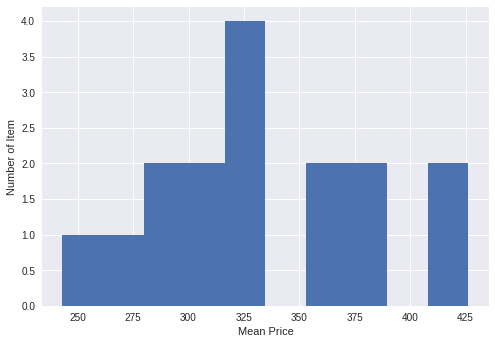

In [119]:
df[grocery_store & low_fat].groupby("Item_Type")["Item_Outlet_Sales"].mean().hist()
plt.xlabel('Mean Price')
plt.ylabel('Number of Item')


En el grafico se aprecia  el promedio de ventas de Items "Low Fat" en tiendas tipo " Grocery Store"

In [120]:
df[low_fat & grocery_store]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
59,FDI26,5.940,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,13.500,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,7.365,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


# Boxplot

Se busca evaluar los objetos vendidos en tienda tipo "Grocery Store" y el rango de valor de ellos.

esto para identificar posibles outliers o precios fuera de lo comun

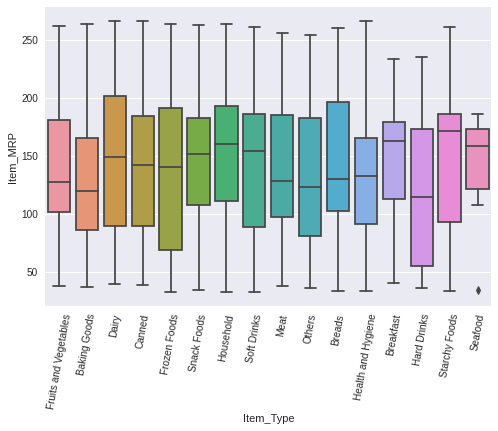

In [121]:
#Filtros para graficar
tienda = df["Outlet_Type"] == "Grocery Store"  # aislamos el tipo de tienda para su analisis
df_tienda = df[tienda] # se asigna filtro a dataframe
grafico = sns.boxplot(x="Item_Type",y="Item_MRP", data=df_tienda)
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=80); #linea de codigo nos ayuda a rotar etiquetas para su mejor comprension. fuente: stackoverflow

El boxplot nos permite ver valores minimos y maximos, como tambien la concentracion de precios de productos por categoria.
donde tambien se aprecia un outlier en categoria "Seafood"

In [122]:
#OUTLIER visto en Comida tipo Seafood
df_tienda[(df_tienda["Item_Type"] == "Seafood") & (df_tienda["Item_MRP"] < 50)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6986,FDJ45,17.75,Low Fat,0.128533,Seafood,34.2216,OUT019,1985,Small,Tier 1,Grocery Store,173.108


# Heatmap

Se busca identificar una relacion entre suma vendida y visibilidad de item en las tiendas "Grocery Store".

se crea un dataframe a partir de las columnas de interes

In [123]:
df_heatmap = df[["Item_Visibility","Item_Type","Item_MRP","Item_Weight","Item_Outlet_Sales","Outlet_Type"]]

A continuacion se crea filtro para tienda Grocery Store

In [124]:
filtro_tienda = df_heatmap["Outlet_Type"] == "Grocery Store"

corr = df_heatmap[filtro_tienda].corr()

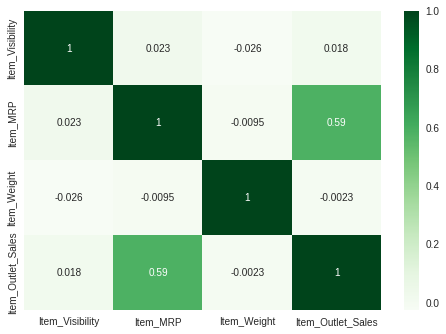

In [125]:
grafico_heatmap =sns.heatmap(corr, cmap="Greens", annot=True)

Se puede apreciar una  correlacion positiva entre los valores

item_visibility y item_outlet_sales, aunque pequena. es donde se pretende mejorar para aumentar las ventas

# Proyecto 1 - Parte 4


• Creen un mínimo de dos visualizaciones de datos para ayudar a otros

comprender las tendencias en los datos (análisis de datos explicativos).

• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

## Se busca potenciar ventas de tiendas Grocery Store, para lo cual, primero debemos visualizar el total de ventas por tipo de objeto vendidos

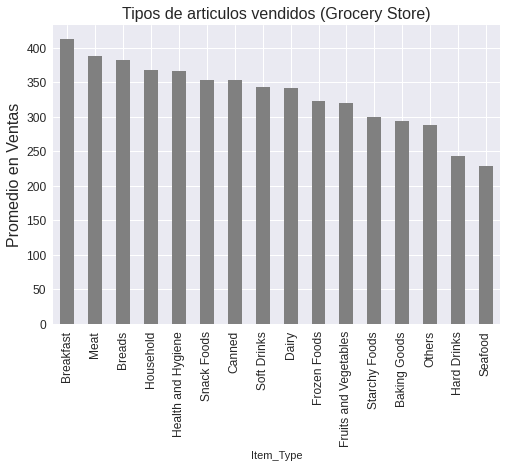

In [126]:
tipo_tienda = df["Outlet_Type"] == "Grocery Store"# aislamos el tipo de tienda para ejecutar analisis

df[tipo_tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).plot(kind="bar",fontsize = 12, color="gray")
plt.style.use('seaborn');
plt.title('Tipos de articulos vendidos (Grocery Store)',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);

# Comparacion TOP 3, mayor promedio de ventas vs menor promedio de ventas para su posterior analisis

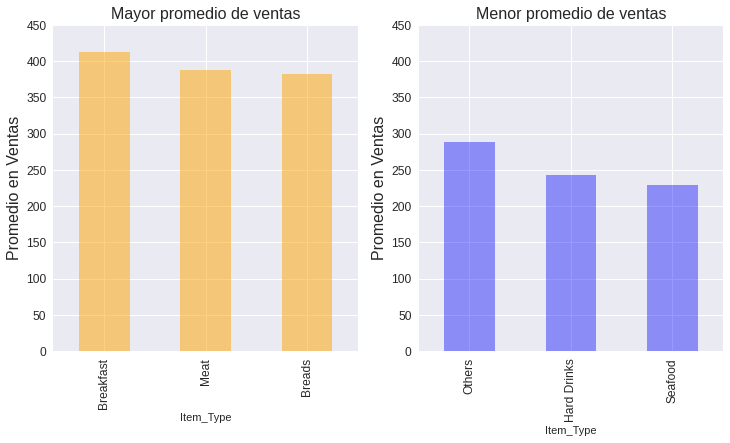

In [127]:
plt.figure(figsize =(12,6)) # define el tamanio del grafico a visualizar

plt.subplot(1,2,1); # nos ayuda a comparar 2 graficos
plt.style.use('seaborn');
df[tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).head(3).plot(kind="bar",fontsize = 12,color = 'orange',alpha =.5)
plt.title('Mayor promedio de ventas',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=450); #como se compara el item mas alto con el mas bajo en graficos distintos , es importante mantener la escala del grafico para evitar sesgo visual

plt.subplot(1,2,2);
plt.style.use('seaborn');
df[tienda].groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).tail(3).plot(kind="bar",fontsize = 12,color = "blue",alpha = .4)
plt.title('Menor promedio de ventas',fontsize = 16);
plt.ylabel('Promedio en Ventas',fontsize = 16);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=450);

# Parte 5

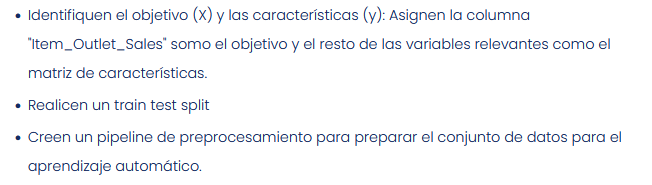

Codificacion ordinal

"Item_Fat_Content": Low fat, Regular > 0, 1

"Outlet_Size": Small, Medium, High > 0, 1 , 2

"Outlet_Location_Type" Tier1 , Tier2, Tier 3 > 0, 1, 2

In [148]:
replacement_fat_content = {"Low Fat":0,"Regular":1}
replacement_outlet_size = {"Small":0,"Medium":1,"High":2}
replacement_outlet_location = {"Tier 1":0,"Tier 2":1,"Tier 3": 2}

df["Item_Fat_Content"].replace(replacement_fat_content, inplace=True)
df["Outlet_Size"].replace(replacement_outlet_size, inplace=True)
df["Outlet_Location_Type"].replace(replacement_outlet_location, inplace=True)

In [149]:
df["Outlet_Location_Type"].value_counts()

2    3347
1    2785
0    2387
Name: Outlet_Location_Type, dtype: int64

#Train test split

In [150]:
from pandas.core.common import random_state
X = df.drop(columns = "Item_Outlet_Sales")

y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)

In [151]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5943,FDM58,16.85,1,0.079624,Snack Foods,111.6544,OUT013,1987,2,2,Supermarket Type1
1236,FDT34,9.30,0,0.174317,Snack Foods,106.7964,OUT035,2004,0,1,Supermarket Type1
7969,DRJ59,11.65,0,0.032425,Hard Drinks,38.8164,OUT010,1998,1,2,Grocery Store
7530,FDO57,20.75,0,0.190337,Snack Foods,159.4578,OUT019,1985,0,0,Grocery Store
3027,DRG13,17.25,0,0.037179,Soft Drinks,162.5526,OUT035,2004,0,1,Supermarket Type1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   int64  
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   int64  
 9   Outlet_Location_Type       8519 non-null   int64  
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 865.2+ KB


# Instanciar selectores de columnas

In [153]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

# Instanciar transformadores

In [155]:
# scaler
scaler = StandardScaler()

# onehotencoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [160]:
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

# instanciar column transformer

In [161]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1015582190>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1015582d60>)])

# Transformador de datos

In [162]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1015582190>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1015582d60>)])

In [164]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [165]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6389, 1586)




array([[ 0.86031251,  1.35444321,  0.26146382, ...,  1.        ,
         0.        ,  0.        ],
       [-0.76550491, -0.73831076,  2.0952062 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.25945578, -0.73831076, -0.65254708, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.17122433, -0.73831076, -0.58124448, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.02181755, -0.73831076, -0.15377208, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.50500142, -0.73831076,  0.49620477, ...,  1.        ,
         0.        ,  0.        ]])

In [166]:
X_train_processed_df = pd.DataFrame(X_train_processed)
X_train_processed_df

,0,1,2,3,4,5,6,7,8,9,...,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585
0,0.860313,1.354443,0.261464,-0.482661,-1.305332,1.941109,1.097203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.765505,-0.738311,2.095206,-0.560641,0.731095,-1.380639,-0.138916,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.259456,-0.738311,-0.652547,-1.651847,0.012356,0.280235,1.097203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.700139,-0.738311,2.405438,0.284673,-1.544912,-1.380639,-1.375035,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.946449,-0.738311,-0.560487,0.334351,0.731095,-1.380639,-0.138916,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,1.323294,1.354443,-0.009697,0.719095,0.731095,-1.380639,-0.138916,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6385,-1.492278,1.354443,1.846350,-1.544425,0.012356,0.280235,1.097203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6386,0.171224,-0.738311,-0.581244,0.686526,1.330044,0.280235,1.097203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6387,1.021818,-0.738311,-0.153772,0.203990,0.132146,0.280235,-1.375035,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
